# Online News Popularity

## Data Mining

In [70]:
import numpy as np
import pandas as pd
%matplotlib notebook
import scipy.stats
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, BaggingClassifier
from sklearn import metrics 
from sklearn.preprocessing import QuantileTransformer

'''
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
'''

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
missing_values = ["n/a", "na", "--","-"]

def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',', na_values = missing_values)
    return dataset

# Carreguem dataset d'exemple
#dataset = load_dataset('OnlineNewsPopularity.csv')
#dataset = load_dataset('OnlineNewsPopularity50p.csv')
dataset = load_dataset('OnlineNewsPopularity25p.csv')
data = dataset.values

x = data[:, :60]
y = data[:, 60]

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (9911, 61)
Dimensionalitat de les entrades X (9911, 60)
Dimensionalitat de l'atribut Y (9911,)


In [3]:
print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())
print("#############################################")
print(dataset.isnull().values.any())

Per comptar el nombre de valors no existents:
url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64
#############################################
False


In [3]:
print("Per visualitzar les primeres 5 mostres de la BBDD:")
dataset.head() 

Per visualitzar les primeres 5 mostres de la BBDD:


url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...         731   
1  http://mashable.com/2013/01/07/ap-samsung-spon...         731   
2  http://mashable.com/2013/01/07/apple-40-billio...         731   
3  http://mashable.com/2013/01/07/astronaut-notre...         731   
4   http://mashable.com/2013/01/07/att-u-verse-apps/         731   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0               12                219             0.664              1.000   
1                9                255             0.605              1.000   
2                9                211             0.575              1.000   
3                9                531             0.504              1.000   
4               13               1072             0.416              1.000   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                      0.815           4                2          1  ...   
1                      0.792           3                1          1  ...   
2                      0.664           3                1          1  ...   
3                      0.666           9                0          1  ...   
4                      0.541          19               19         20  ...   

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                   0.100                   0.700                  -0.350   
1                   0.033                   0.700                  -0.119   
2                   0.100                   1.000                  -0.467   
3                   0.136                   0.800                  -0.370   
4                   0.033                   1.000                  -0.220   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                  -0.600                  -0.200                0.500   
1                  -0.125                  -0.100                0.000   
2                  -0.800                  -0.133                0.000   
3                  -0.600                  -0.167                0.000   
4                  -0.500                  -0.050                0.455   

    title_sentiment_polarity   abs_title_subjectivity  \
0                     -0.188                    0.000   
1                      0.000                    0.500   
2                      0.000                    0.500   
3                      0.000                    0.500   
4                      0.136                    0.045   

    abs_title_sentiment_polarity   shares  
0                          0.188      593  
1                          0.000      711  
2                          0.000     1500  
3                          0.000     1200  
4                          0.136      505  

[5 rows x 61 columns]

In [4]:
print("Per veure estadístiques dels atributs numèrics de la BBDD:")
dataset.describe()

Per veure estadístiques dels atributs numèrics de la BBDD:


timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count    9911.000         9911.000           9911.000          9911.000   
mean      640.180            9.761            486.508             0.561   
std        55.022            1.965            408.912             0.119   
min       542.000            2.000              0.000             0.000   
25%       593.000            8.000            222.000             0.488   
50%       643.000           10.000            358.000             0.560   
75%       688.000           11.000            626.000             0.634   
max       731.000           18.000           4979.000             1.000   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
count           9911.000                   9911.000    9911.000   
mean               0.992                      0.704       9.927   
std                0.088                      0.122      10.381   
min                0.000                      0.000       0.000   
25%                1.000                      0.643       4.000   
50%                1.000                      0.710       7.000   
75%                1.000                      0.777      12.000   
max                1.000                      1.000     171.000   

        num_self_hrefs   num_imgs   num_videos  ...   min_positive_polarity  \
count         9911.000   9911.000     9911.000  ...                9911.000   
mean             3.313      3.491        1.219  ...                   0.099   
std              4.417      7.646        4.380  ...                   0.071   
min              0.000      0.000        0.000  ...                   0.000   
25%              1.000      0.000        0.000  ...                   0.050   
50%              2.000      1.000        0.000  ...                   0.100   
75%              4.000      1.000        1.000  ...                   0.100   
max             74.000     99.000       75.000  ...                   1.000   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
count                9911.000                9911.000                9911.000   
mean                    0.766                  -0.255                  -0.488   
std                     0.226                   0.127                   0.278   
min                     0.000                  -1.000                  -1.000   
25%                     0.600                  -0.323                  -0.700   
50%                     0.800                  -0.248                  -0.500   
75%                     1.000                  -0.179                  -0.292   
max                     1.000                   0.000                   0.000   

        max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
count                9911.000             9911.000                   9911.000   
mean                   -0.113                0.271                      0.082   
std                     0.098                0.323                      0.261   
min                    -1.000                0.000                     -1.000   
25%                    -0.125                0.000                      0.000   
50%                    -0.100                0.100                      0.000   
75%                    -0.050                0.500                      0.150   
max                     0.000                1.000                      1.000   

        abs_title_subjectivity   abs_title_sentiment_polarity     shares  
count                 9911.000                       9911.000   9911.000  
mean                     0.349                          0.152   3316.705  
std                      0.187                          0.227  14567.618  
min                      0.000                          0.000      4.000  
25%                      0.167                          0.000    977.500  
50%                      0.500                          0.000   1500.000  
75%                      0.500 

<IPython.core.display.Javascript object>


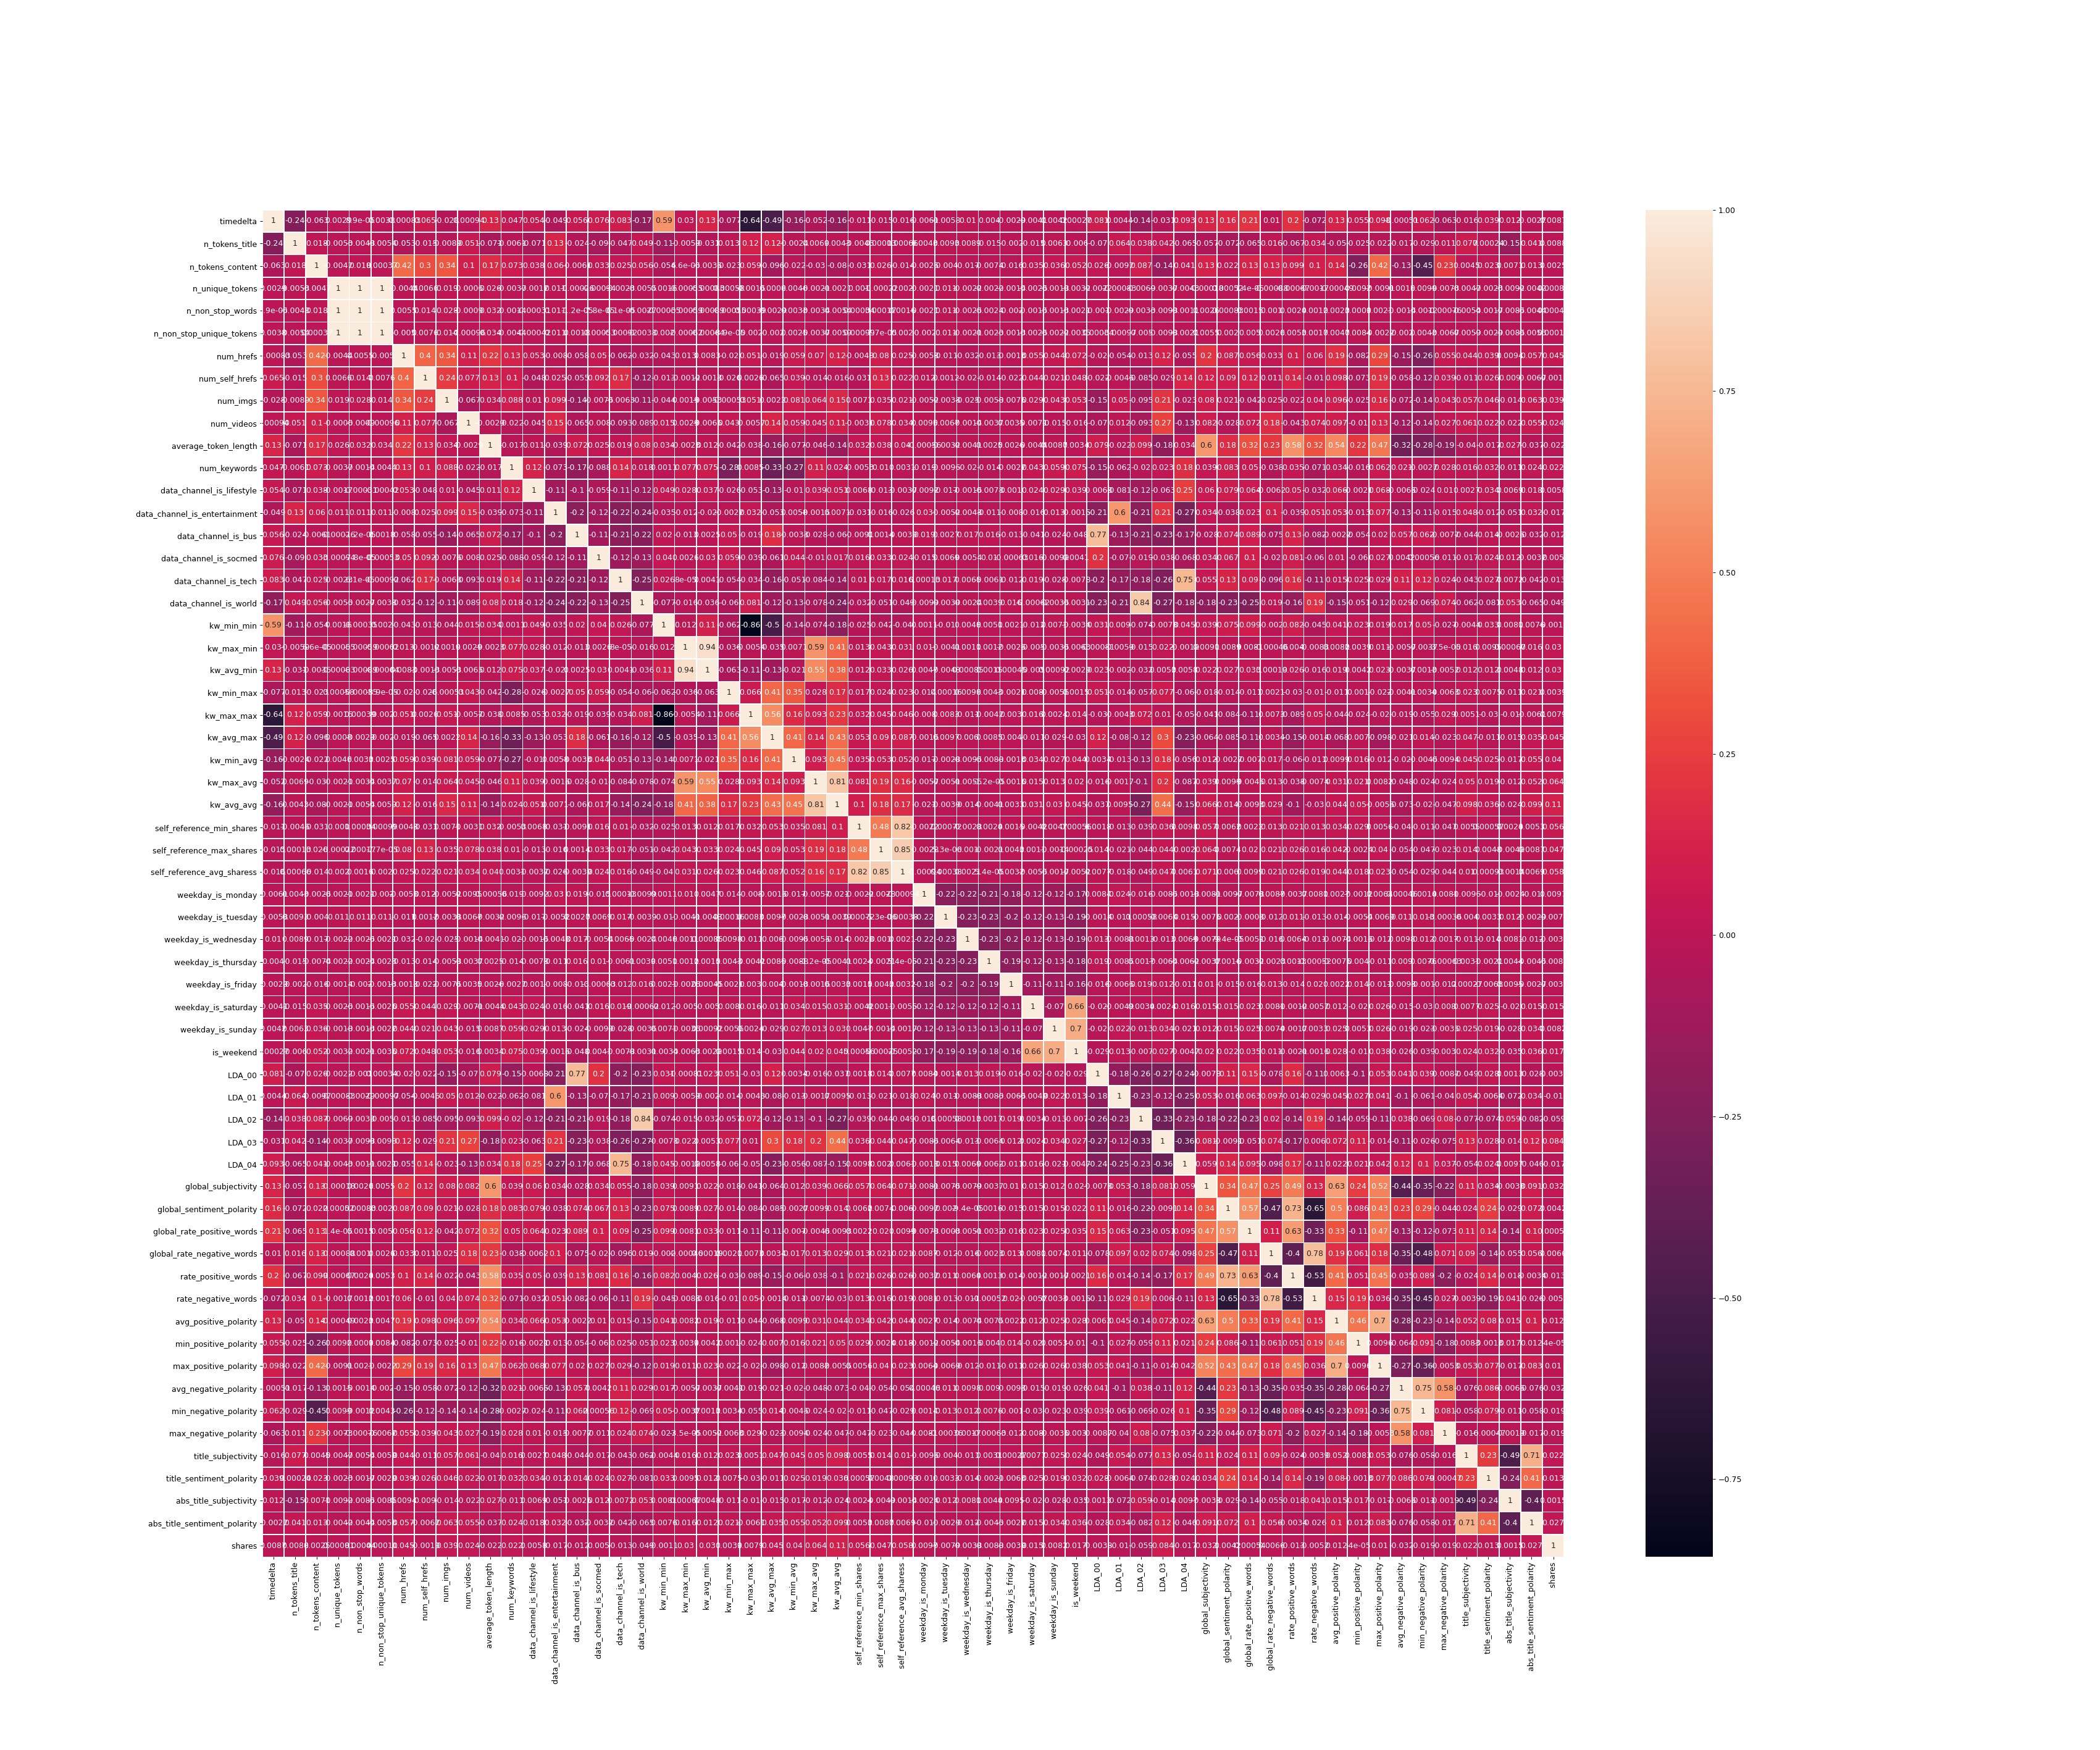

In [6]:
# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset.corr()

plt.figure(figsize=(42, 35))

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

Com podem veure en la matriu de correlació, els atributs **n_unique_tokens** (percentatge de paraules úniques al contingut), **n_non_stop_words** (percentatge de paraules sense parar al contingut), **n_non_stop_unique_tokens** (percentatge de paraules úniques sense parar al contingut), **kw_max_min** (pitjor paraula clau (compartiments màxims)), **kw_avg_min** (pitjor paraula clau (comparticions mitjanes)) estan directment relcionats, fent que siguin linealment dependents. 

Y els atributs **kw_max_avg** (mitjana. paraula clau (màx. comparticions)), **kw_avg_avg** (mitjana. paraula clau (mitjana compartida)), **self_reference_min_shares** (mín. comparticions d'articles de referència a Mashable), **self_reference_max_shares** (màx. comparticions d'articles de referència a Mashable), **self_reference_avg_sharess** (mitjana. comparticions d'articles de referència a Mashable) com es pot intuir els **avg** es la mitjana dels altres atributs amb el nom similar.

Gracies a aixó, podem decidir eliminar un atribut per parella o les mitjanes per simplificar més la nostra base de dades i així evitar un posible *overfitting* a futur. 

In [71]:
dataset1=dataset.drop([' n_non_stop_words',' n_unique_tokens',' kw_avg_min',' kw_avg_avg',' self_reference_avg_sharess', 'url'],axis=1)
data = dataset1.values

x = data[:, :54]
y = data[:, 54]

print("Dimensionalitat de la BBDD:", dataset1.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

print("Per visualitzar les primeres 5 mostres de la BBDD:")
dataset1.head()

Dimensionalitat de la BBDD: (9911, 55)
Dimensionalitat de les entrades X (9911, 54)
Dimensionalitat de l'atribut Y (9911,)
Per visualitzar les primeres 5 mostres de la BBDD:


timedelta   n_tokens_title   n_tokens_content   n_non_stop_unique_tokens  \
0         731               12                219                      0.815   
1         731                9                255                      0.792   
2         731                9                211                      0.664   
3         731                9                531                      0.666   
4         731               13               1072                      0.541   

    num_hrefs   num_self_hrefs   num_imgs   num_videos   average_token_length  \
0           4                2          1            0                  4.680   
1           3                1          1            0                  4.914   
2           3                1          1            0                  4.393   
3           9                0          1            0                  4.405   
4          19               19         20            0                  4.683   

    num_keywords  ...   min_positive_polarity   max_positive_polarity  \
0              5  ...                   0.100                   0.700   
1              4  ...                   0.033                   0.700   
2              6  ...                   0.100                   1.000   
3              7  ...                   0.136                   0.800   
4              7  ...                   0.033                   1.000   

    avg_negative_polarity   min_negative_polarity   max_negative_polarity  \
0                  -0.350                  -0.600                  -0.200   
1                  -0.119                  -0.125                  -0.100   
2                  -0.467                  -0.800                  -0.133   
3                  -0.370                  -0.600                  -0.167   
4                  -0.220                  -0.500                  -0.050   

    title_subjectivity   title_sentiment_polarity   abs_title_subjectivity  \
0                0.500                     -0.188                    0.000   
1                0.000                      0.000                    0.500   
2                0.000                      0.000                    0.500   
3                0.000                      0.000                    0.500   
4                0.455                      0.136                    0.045   

    abs_title_sentiment_polarity   shares  
0                          0.188      593  
1                          0.000      711  
2                          0.000     1500  
3                          0.000     1200  
4                          0.136      505  

[5 rows x 55 columns]

In [6]:
print("Per veure estadístiques dels atributs numèrics de la BBDD:")
dataset1.describe()

Per veure estadístiques dels atributs numèrics de la BBDD:


timedelta   n_tokens_title   n_tokens_content  \
count    9911.000         9911.000           9911.000   
mean      640.180            9.761            486.508   
std        55.022            1.965            408.912   
min       542.000            2.000              0.000   
25%       593.000            8.000            222.000   
50%       643.000           10.000            358.000   
75%       688.000           11.000            626.000   
max       731.000           18.000           4979.000   

        n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
count                   9911.000    9911.000         9911.000   9911.000   
mean                       0.704       9.927            3.313      3.491   
std                        0.122      10.381            4.417      7.646   
min                        0.000       0.000            0.000      0.000   
25%                        0.643       4.000            1.000      0.000   
50%                        0.710       7.000            2.000      1.000   
75%                        0.777      12.000            4.000      1.000   
max                        1.000     171.000           74.000     99.000   

        num_videos   average_token_length   num_keywords  ...  \
count     9911.000               9911.000       9911.000  ...   
mean         1.219                  4.628          7.118  ...   
std          4.380                  0.497          1.875  ...   
min          0.000                  0.000          1.000  ...   
25%          0.000                  4.470          6.000  ...   
50%          0.000                  4.642          7.000  ...   
75%          1.000                  4.832          9.000  ...   
max         75.000                  6.308         10.000  ...   

        min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
count                9911.000                9911.000                9911.000   
mean                    0.099                   0.766                  -0.255   
std                     0.071                   0.226                   0.127   
min                     0.000                   0.000                  -1.000   
25%                     0.050                   0.600                  -0.323   
50%                     0.100                   0.800                  -0.248   
75%                     0.100                   1.000                  -0.179   
max                     1.000                   1.000                   0.000   

        min_negative_polarity   max_negative_polarity   title_subjectivity  \
count                9911.000                9911.000             9911.000   
mean                   -0.488                  -0.113                0.271   
std                     0.278                   0.098                0.323   
min                    -1.000                  -1.000                0.000   
25%                    -0.700                  -0.125                0.000   
50%                    -0.500                  -0.100                0.100   
75%                    -0.292                  -0.050                0.500   
max                     0.000                   0.000                1.000   

        title_sentiment_polarity   abs_title_subjectivity  \
count                   9911.000                 9911.000   
mean                       0.082                    0.349   
std                        0.261                    0.187   
min                       -1.000                    0.000   
25%                        0.000                    0.167   
50%                        0.000                    0.500   
75%                        0.150                    0.500   
max                        1.000                    0.500   

        abs_title_sentiment_polarity     shares  
count                       9911.000   9911.000  
mean                           0.152   3316.705  
std                            0.227  14567.618  
min                            0.000    

<IPython.core.display.Javascript object>


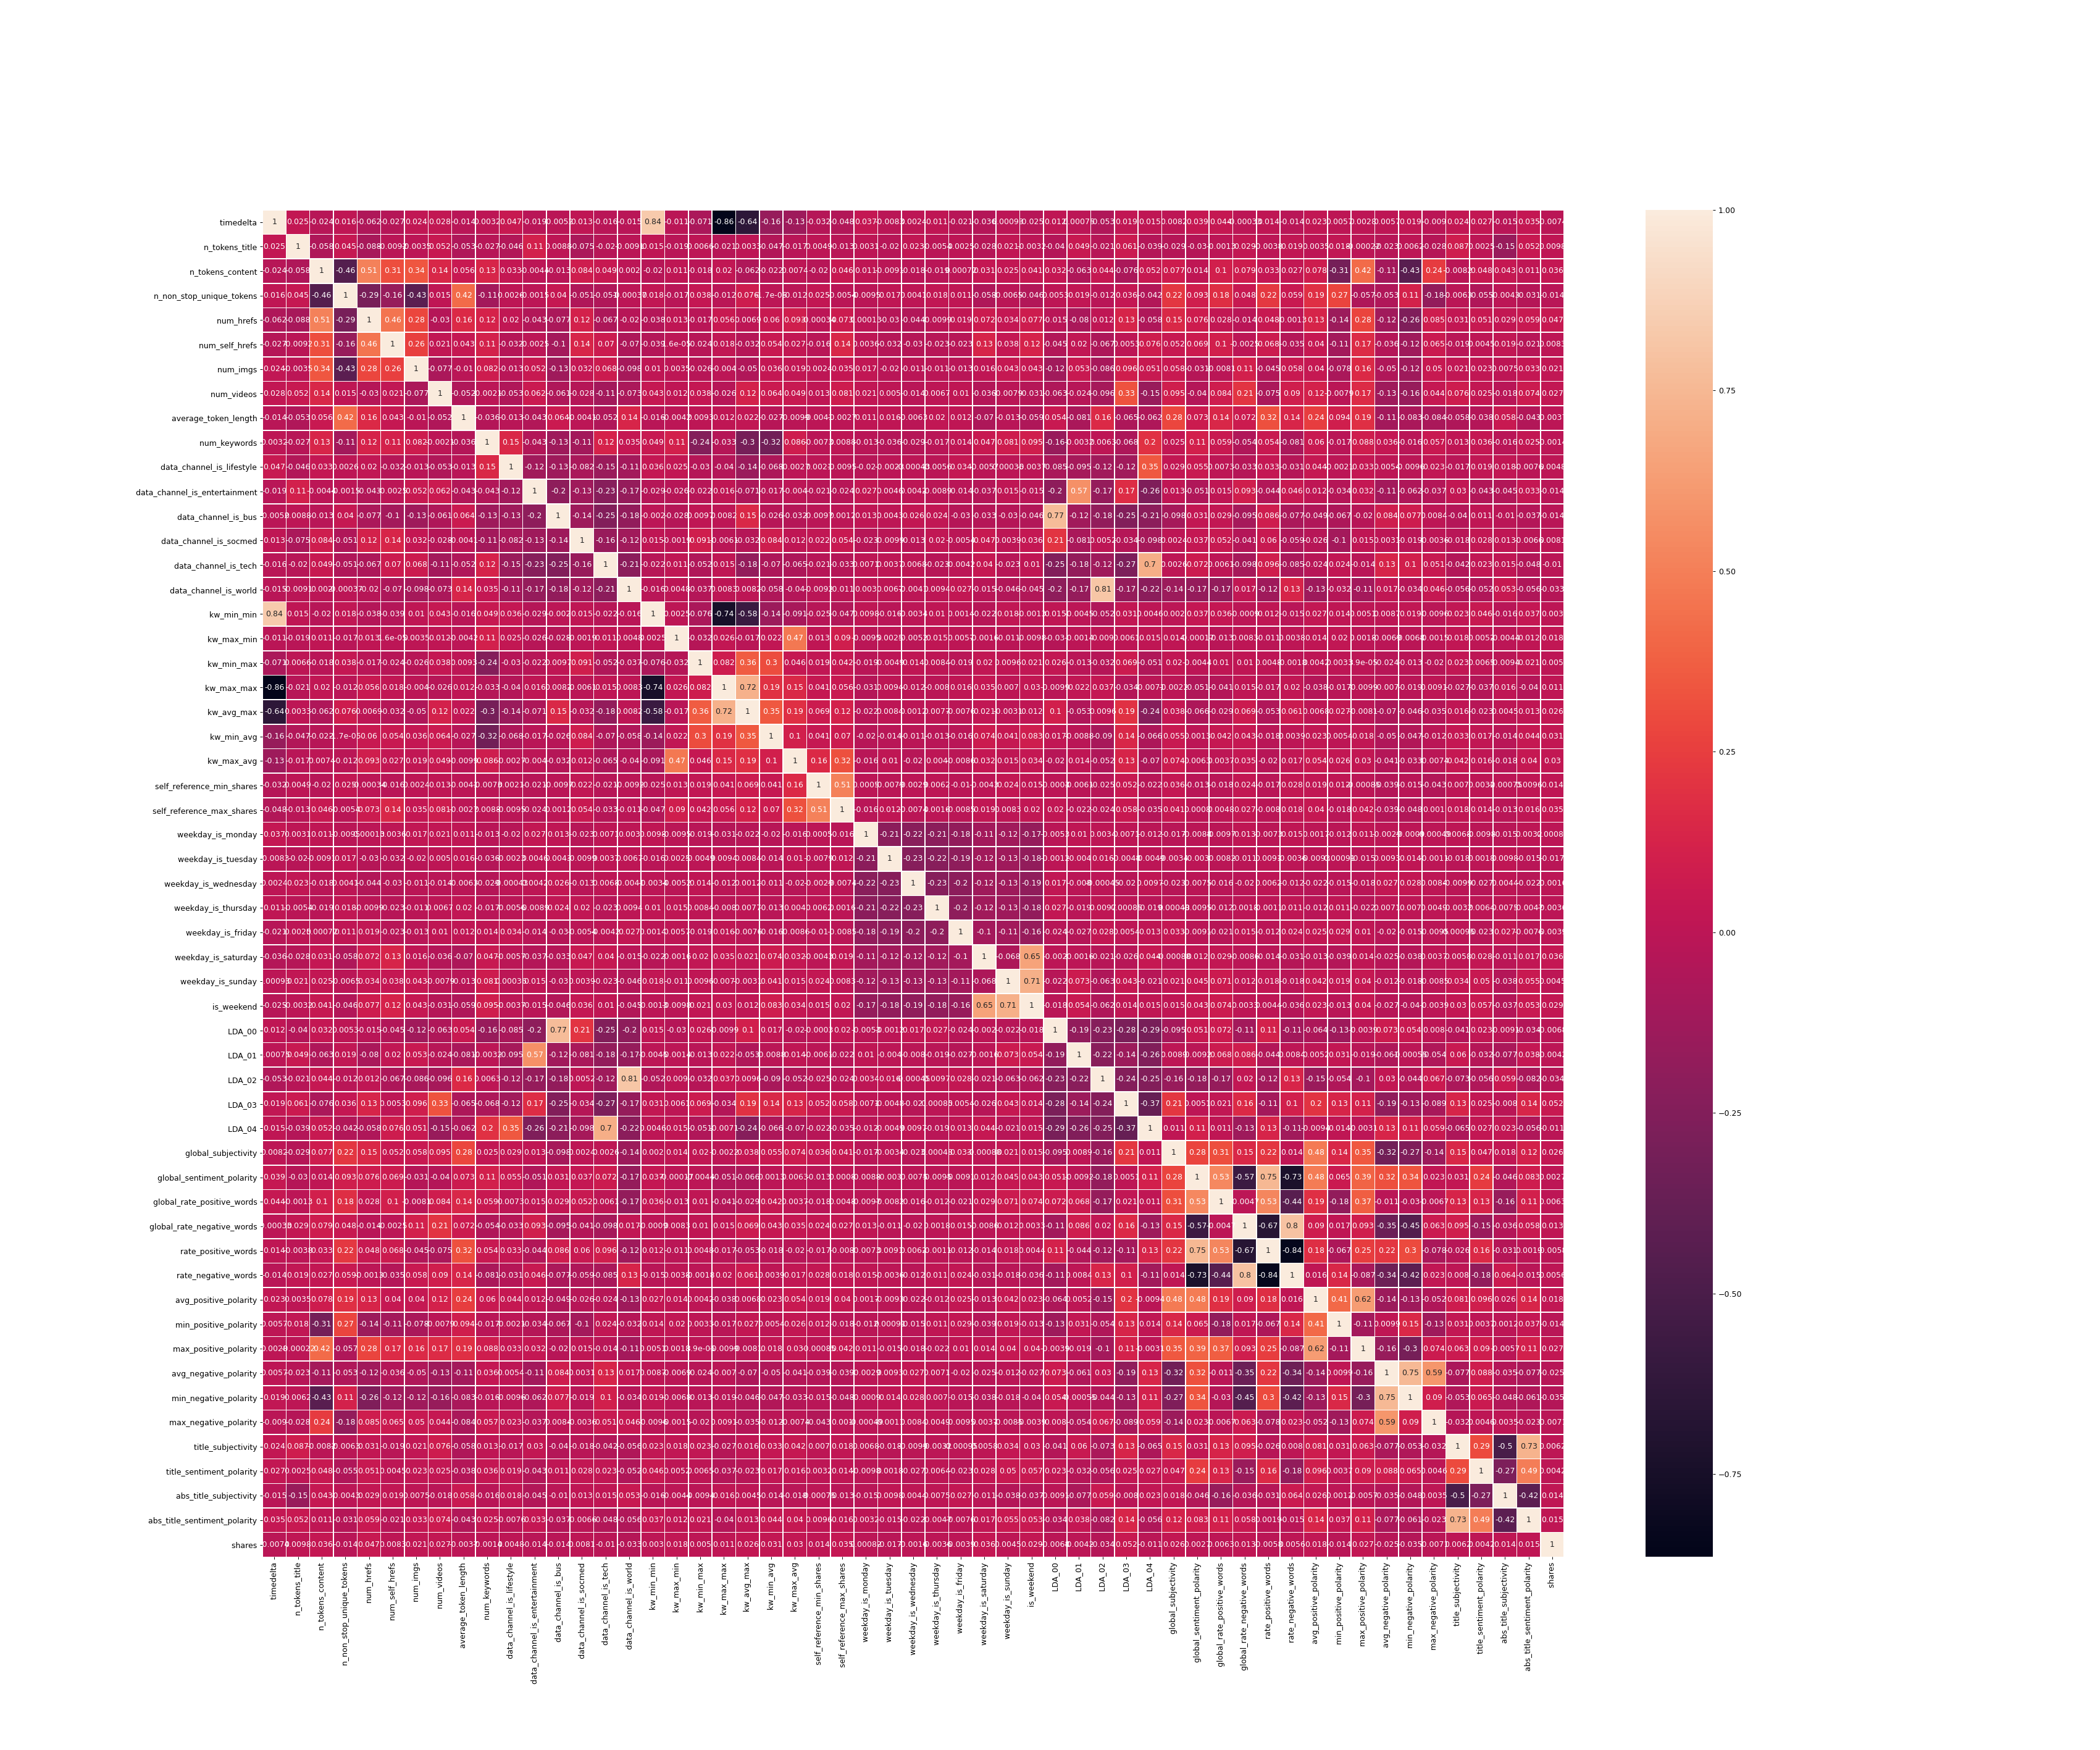

In [7]:
# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset1.corr()

plt.figure(figsize=(42, 35))

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

Després de fer la neteja dels atributs, podem veure en el Heatmap que els atributs que tenen més correlació son:
    **LDA_00** (Proximitat amb el tema LDA 0)    - **data_channel_is_bus** (el canal de dades és 'Business'?)
    **LDA_02** (Proximitat amb el tema 2 de LDA) - **data_channel_is_world** (el canal de dades és "Món"?)
    **LDA_04** (Proximitat amb el tema 4 de LDA) - **data_channel_is_tech** (el canal de dades és "Tech"?)

A continuació els histogramas dels atributs anteriorment dits: 


<IPython.core.display.Javascript object>


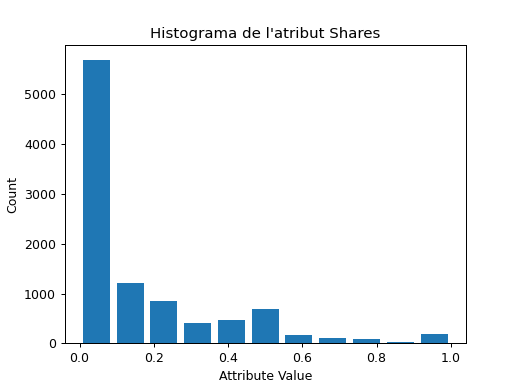

<IPython.core.display.Javascript object>


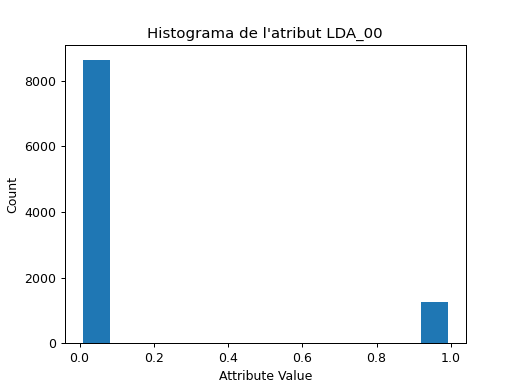

<IPython.core.display.Javascript object>


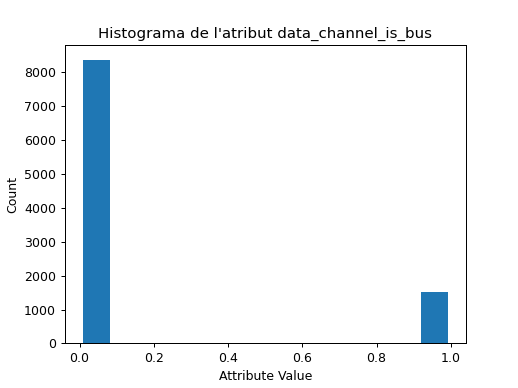

<IPython.core.display.Javascript object>


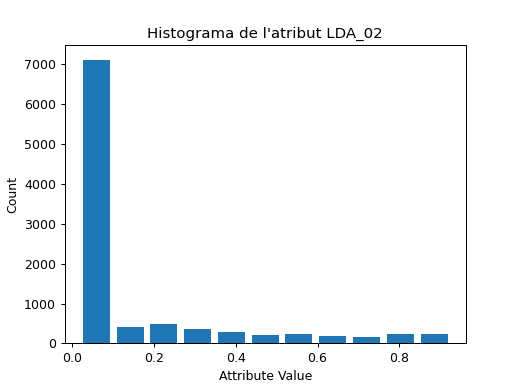

<IPython.core.display.Javascript object>


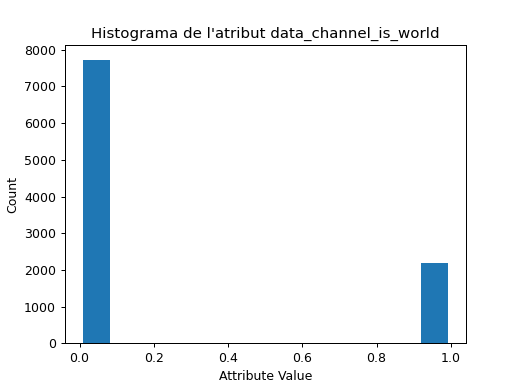

<IPython.core.display.Javascript object>


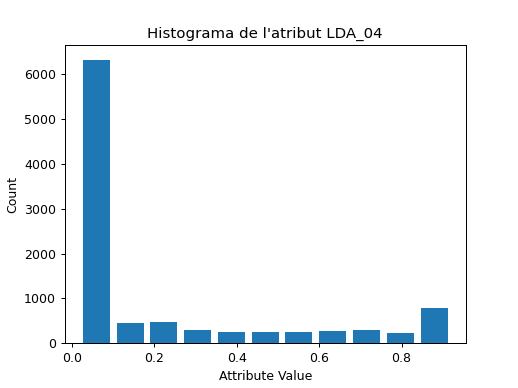

<IPython.core.display.Javascript object>


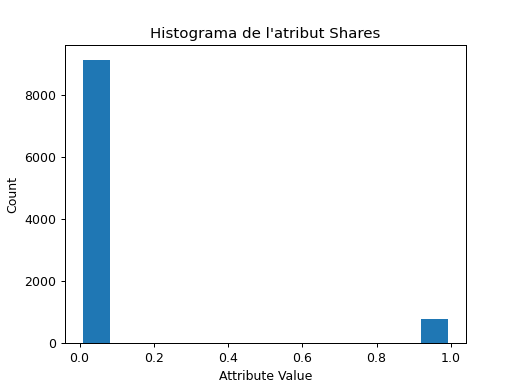

In [67]:
print("A continuació els histogramas dels atributs anteriorment dits: ")

plt.figure()
plt.title("Histograma de l'atribut Shares")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x[:,53], bins=11, range=[np.min(x[:,53]), np.max(x[:,53])], histtype="bar", rwidth=0.8)

plt.figure()
plt.title("Histograma de l'atribut LDA_00")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x[:,32], bins=11, range=[np.min(x[:,32]), np.max(x[:,32])], histtype="bar", rwidth=0.8)

plt.figure()
plt.title("Histograma de l'atribut data_channel_is_bus")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x[:,11], bins=11, range=[np.min(x[:,11]), np.max(x[:,11])], histtype="bar", rwidth=0.8)

plt.figure()
plt.title("Histograma de l'atribut LDA_02")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x[:,34], bins=11, range=[np.min(x[:,34]), np.max(x[:,34])], histtype="bar", rwidth=0.8)

plt.figure()
plt.title("Histograma de l'atribut data_channel_is_world")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x[:,14], bins=11, range=[np.min(x[:,14]), np.max(x[:,14])], histtype="bar", rwidth=0.8)

plt.figure()
plt.title("Histograma de l'atribut LDA_04")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x[:,36], bins=11, range=[np.min(x[:,36]), np.max(x[:,36])], histtype="bar", rwidth=0.8)

plt.figure()
plt.title("Histograma de l'atribut Shares")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x[:,13], bins=11, range=[np.min(x[:,13]), np.max(x[:,13])], histtype="bar", rwidth=0.8)

In [9]:
# Mirem la relació entre atributs utilitzant la funció pairplot
'''relacio = sns.pairplot(dataset, corner=True)'''

'relacio = sns.pairplot(dataset, corner=True)'

## Model Learning

Gracies al procés del Data Mining que s'ha fet, podem veure i dir que els atributs en general no tenen molta correlació entre ells, i els que si ho están poden ser no molt importants, sumant aixó amb que en els atributs hi han moltes anomalies, podem dir que que el millor algoritme de predicció sería el **Random Forest**.
Pero esta clar que s'utilitzará altres per fer comparatives.

In [72]:
X = data[:, :54]
y = data[:, 54]

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

In [73]:
import math

def mean_squeared_error(y1, y2):
    # comprovem que y1 i y2 tenen la mateixa mida
    assert(len(y1) == len(y2))
    mse = 0
    for i in range(len(y1)):
        mse += (y1[i] - y2[i])**2
    return mse / len(y1)

In [74]:
from sklearn.linear_model import LinearRegression

def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

In [75]:
def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

x_train = standarize(x_train)
x_test = standarize(x_test)

<IPython.core.display.Javascript object>


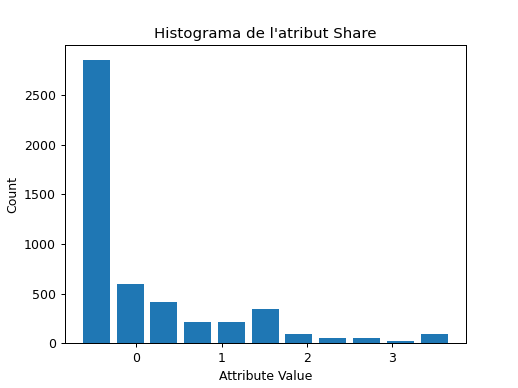

In [76]:
plt.figure()
plt.title("Histograma de l'atribut Share")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x_train[:,53], bins=11, range=[np.min(x_train[:,53]), np.max(x_train[:,53])], histtype="bar", rwidth=0.8)

In [77]:
len(x_train), len(x_test), len(y_train), len(y_test)

(4955, 4956, 4955, 4956)

In [78]:
BaggingC = BaggingClassifier().fit(x_train, y_train)
predicted_test = BaggingC.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_test)))

Mean Absolute Error: 2364.0954398708636
Mean Squared Error: 54423252.155972555
Root Mean Squared Error: 7377.211678945681


In [79]:
random_forest = RandomForestRegressor(min_samples_split=9, random_state=0)
random_forest.fit(x_train, y_train)
predicted_test = random_forest.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_test)))

Mean Absolute Error: 3683.740871682381
Mean Squared Error: 117666886.51509224
Root Mean Squared Error: 10847.436863844483


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier(min_samples_split=2, random_state=0, n_estimators=50, learning_rate=1.0, max_depth=1)
gradient_boosting.fit(x_train, y_train)
predicted_test = gradient_boosting.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_test)))

In [ ]:
qt_data = QuantileTransformer(n_quantiles=10, random_state=0).fit_transform(data)

X = qt_data[:, :54]
y = qt_data[:, 54]

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)